In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [36]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [37]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               

In [38]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
#shuffle the original training set

In [39]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [40]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/70
136/136 [==============================] - 2s 6ms/step - loss: 42398.9023 - root_mean_squared_error: 205.9099 - val_loss: 33107.5312 - val_root_mean_squared_error: 181.9548
Epoch 2/70
136/136 [==============================] - 0s 3ms/step - loss: 24733.9688 - root_mean_squared_error: 157.2704 - val_loss: 18271.4199 - val_root_mean_squared_error: 135.1718
Epoch 3/70
136/136 [==============================] - 0s 3ms/step - loss: 13214.3457 - root_mean_squared_error: 114.9537 - val_loss: 9744.8008 - val_root_mean_squared_error: 98.7158
Epoch 4/70
136/136 [==============================] - 0s 4ms/step - loss: 7863.5654 - root_mean_squared_error: 88.6768 - val_loss: 7157.7095 - val_root_mean_squared_error: 84.6032
Epoch 5/70
136/136 [==============================] - 0s 3ms/step - loss: 6990.1636 - root_mean_squared_error: 83.6072 - val_loss: 7131.0679 - val_root_mean_squared_error: 84.4456
Epoch 6/70
136/136 [==============================] - 0s 3ms/step - loss: 6986.8306 - root

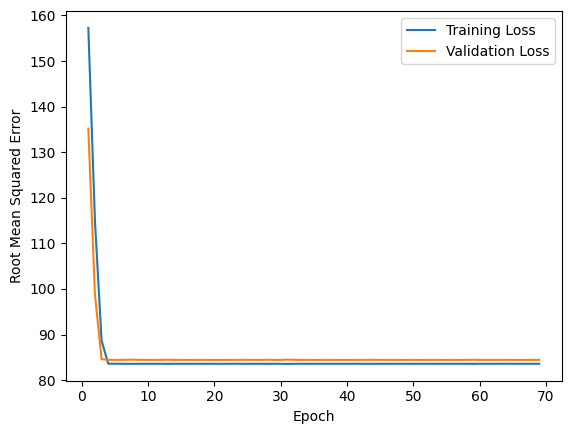

In [45]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2
# Yes, after shuffling the original training set, 
# the final loss for the training set and the 
# validation set become much closer.

# If validation_split < 0.15,
# the final loss values for the training set and
# validation set diverge meaningfully.  Apparently,
# the validation set no longer contains enough examples. 

# Identify the feature and the label.

my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [49]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)


30/30 [==============================] - 0s 2ms/step - loss: 7010.2402 - root_mean_squared_error: 83.7272


In [ ]:
# In the experiments, yes, the rmse values 
# were similar enough. 

In [42]:
train_df.head(17000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111.4
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103.6
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85.8


In [43]:
test_df.head(3000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.0,37.4,27.0,3885.0,661.0,1537.0,606.0,6.6,344.7
1,-118.3,34.3,43.0,1510.0,310.0,809.0,277.0,3.6,176.5
2,-117.8,33.8,27.0,3589.0,507.0,1484.0,495.0,5.8,270.5
3,-118.4,33.8,28.0,67.0,15.0,49.0,11.0,6.1,330.0
4,-119.7,36.3,19.0,1241.0,244.0,850.0,237.0,2.9,81.7
...,...,...,...,...,...,...,...,...,...
2995,-119.9,34.4,23.0,1450.0,642.0,1258.0,607.0,1.2,225.0
2996,-118.1,34.1,27.0,5257.0,1082.0,3496.0,1036.0,3.4,237.2
2997,-119.7,36.3,10.0,956.0,201.0,693.0,220.0,2.3,62.0
2998,-117.1,34.1,40.0,96.0,14.0,46.0,14.0,3.3,162.5
